In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.json

chmod: cannot access '/root/.kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("extracted all files")

extracted all files


In [ ]:
ls

 data/           face-mask-dataset.zip  'images (2).jfif'   kaggle.json
 download.jfif  'images (1).jfif'        images.jfif        sample_data/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
mask_files=os.listdir('/content/data/with_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_354.jpg', 'with_mask_3138.jpg', 'with_mask_3318.jpg', 'with_mask_1916.jpg', 'with_mask_1033.jpg']
['with_mask_941.jpg', 'with_mask_2080.jpg', 'with_mask_209.jpg', 'with_mask_1410.jpg', 'with_mask_3648.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_485.jpg', 'without_mask_2003.jpg', 'without_mask_3544.jpg', 'without_mask_3506.jpg', 'without_mask_2464.jpg']
['without_mask_2294.jpg', 'without_mask_1520.jpg', 'without_mask_2580.jpg', 'without_mask_1431.jpg', 'without_mask_2269.jpg']


In [ ]:
print(len(mask_files))
print(len(without_mask_files))

3725
3828


In [ ]:
# creating labels
mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [ ]:
print(mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels=mask_labels+without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


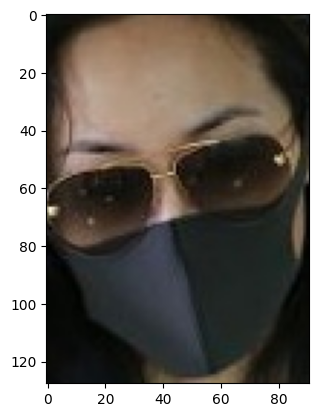

In [ ]:
# display withmask images:
img=mpimg.imread('/content/data/with_mask/with_mask_626.jpg')
plt.imshow(img)
plt.show()

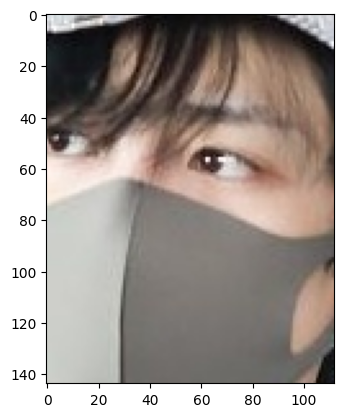

In [ ]:
# display withmask images:
img=mpimg.imread('/content/data/with_mask/with_mask_627.jpg')
plt.imshow(img)
plt.show()

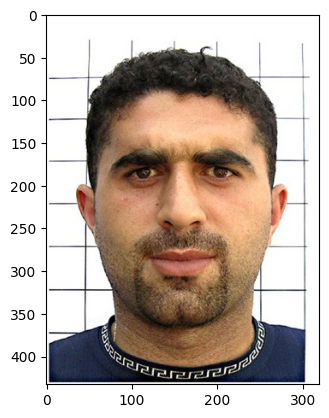

In [ ]:
img2=mpimg.imread('/content/data/without_mask/without_mask_626.jpg')
plt.imshow(img2)
plt.show()

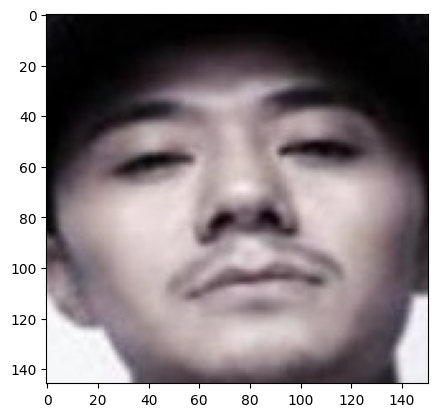

In [ ]:
img2=mpimg.imread('/content/data/without_mask/without_mask_6.jpg')
plt.imshow(img2)
plt.show()

In [ ]:
#resize the images:
with_mask_path='/content/data/with_mask/'

data=[]

for img in mask_files:
  image=Image.open(with_mask_path+img)
  image=image.resize((128,128))

  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)



NameError: name 'mask_files' is not defined

In [ ]:
without_mask_path='/content/data/without_mask/'


for img in without_mask_files:
  image=Image.open(without_mask_path+img)
  image=image.resize((128,128))

  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)






In [ ]:
type(data)

list

array([[[ 46,  55,  70],
        [ 46,  55,  70],
        [ 46,  55,  70],
        ...,
        [ 95, 108, 116],
        [ 91, 104, 112],
        [ 88, 101, 109]],

       [[ 46,  55,  70],
        [ 45,  54,  69],
        [ 45,  54,  69],
        ...,
        [ 94, 107, 115],
        [ 90, 103, 111],
        [ 87, 100, 108]],

       [[ 47,  56,  70],
        [ 46,  56,  69],
        [ 47,  56,  70],
        ...,
        [ 94, 107, 116],
        [ 90, 103, 112],
        [ 87, 100, 109]],

       ...,

       [[246, 161, 173],
        [247, 164, 174],
        [246, 167, 174],
        ...,
        [248, 179, 203],
        [248, 178, 201],
        [248, 178, 200]],

       [[247, 160, 171],
        [248, 163, 172],
        [247, 166, 172],
        ...,
        [245, 178, 204],
        [245, 178, 203],
        [245, 178, 202]],

       [[249, 162, 171],
        [249, 164, 172],
        [248, 166, 172],
        ...,
        [233, 170, 196],
        [233, 170, 195],
        [233, 170, 194]]], dtype=uint8)
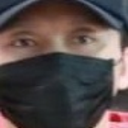

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
len(data)

7553

In [ ]:
x=np.array(data)
y=np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape,y.shape)

(7553, 128, 128, 3) (7553,)


In [ ]:
# print(x)

In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape)

(6042, 128, 128, 3) (6042,) (1511, 128, 128, 3)


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train

array([[[[0.58039216, 0.59607843, 0.60784314],
         [0.81176471, 0.82745098, 0.83529412],
         [0.81176471, 0.82745098, 0.83921569],
         ...,
         [0.77647059, 0.70588235, 0.64313725],
         [0.78039216, 0.70980392, 0.64313725],
         [0.78431373, 0.71372549, 0.63921569]],

        [[0.84705882, 0.8627451 , 0.8745098 ],
         [0.76470588, 0.78039216, 0.78823529],
         [0.25098039, 0.27058824, 0.28235294],
         ...,
         [0.7254902 , 0.62352941, 0.58431373],
         [0.71372549, 0.6       , 0.54901961],
         [0.72941176, 0.61176471, 0.55686275]],

        [[0.57254902, 0.58431373, 0.6       ],
         [0.14117647, 0.15294118, 0.16470588],
         [0.05490196, 0.06666667, 0.08235294],
         ...,
         [0.64705882, 0.52156863, 0.50196078],
         [0.69411765, 0.54509804, 0.51372549],
         [0.69019608, 0.5372549 , 0.49803922]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.02745098, 0.02745098, 0.02745098]

In [ ]:
# building convolutional neural network

import tensorflow as tf
from tensorflow import keras
num=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num,activation='sigmoid')) #sigmoid is used when binary classification is used




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

history=model.fit(x_train,y_train,validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 829ms/step - acc: 0.7226 - loss: 0.5745 - val_acc: 0.8529 - val_loss: 0.3129
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 815ms/step - acc: 0.8771 - loss: 0.3110 - val_acc: 0.8727 - val_loss: 0.3077
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 146s 839ms/step - acc: 0.9056 - loss: 0.2317 - val_acc: 0.9041 - val_loss: 0.2296
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 839ms/step - acc: 0.9147 - loss: 0.2052 - val_acc: 0.9140 - val_loss: 0.2273
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 198s 816ms/step - acc: 0.9343 - loss: 0.1709 - val_acc: 0.9256 - val_loss: 0.1910


In [ ]:
loss, acc=model.evaluate(x_test,y_test)
print(loss,acc )

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - acc: 0.9105 - loss: 0.1954
0.1892441064119339 0.9205824136734009


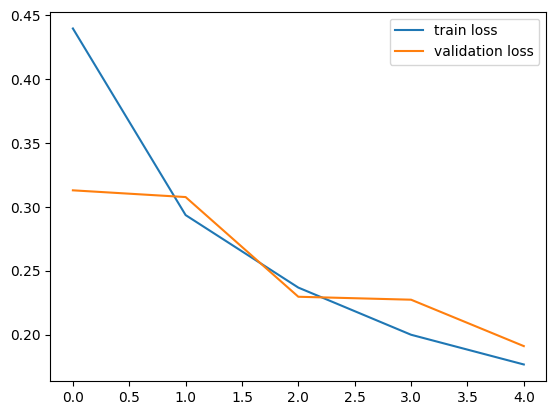

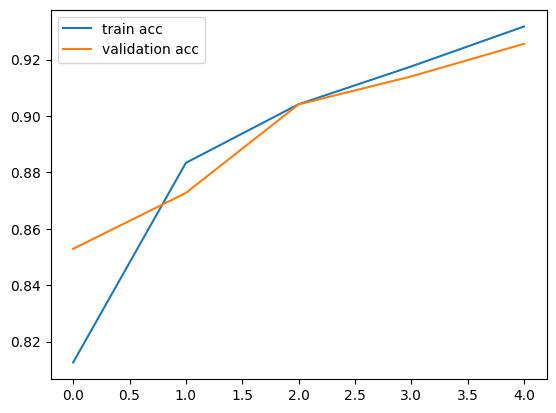

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

plt.show()


plt.plot(history.history['acc'],label='train acc')
plt.plot(history.history['val_acc'],label='validation acc')
plt.legend()

plt.show()

In [ ]:
# predictive system:
input_path=input("Enter the path of the image:")

img=cv2.imread(input_path)

cv2_imshow(img)
resized_img=cv2.resize(img,(128,128))
img=resized_img/255

img=np.reshape(img,[1,128,128,3])

pred=model.predict(img)

print(pred)
p=np.argmax(pred)

print("after applying argmax:",p)

if(p==1):
  print("person has no mask")
else:
  print("person wearing mask")



In [ ]:
without_mask_files

['without_mask_485.jpg',
 'without_mask_2003.jpg',
 'without_mask_3544.jpg',
 'without_mask_3506.jpg',
 'without_mask_2464.jpg',
 'without_mask_2356.jpg',
 'without_mask_2553.jpg',
 'without_mask_3061.jpg',
 'without_mask_2341.jpg',
 'without_mask_21.jpg',
 'without_mask_1565.jpg',
 'without_mask_3551.jpg',
 'without_mask_1761.jpg',
 'without_mask_243.jpg',
 'without_mask_1183.jpg',
 'without_mask_116.jpg',
 'without_mask_1129.jpg',
 'without_mask_3127.jpg',
 'without_mask_1612.jpg',
 'without_mask_1351.jpg',
 'without_mask_532.jpg',
 'without_mask_3579.jpg',
 'without_mask_276.jpg',
 'without_mask_2842.jpg',
 'without_mask_987.jpg',
 'without_mask_414.jpg',
 'without_mask_494.jpg',
 'without_mask_219.jpg',
 'without_mask_954.jpg',
 'without_mask_244.jpg',
 'without_mask_3050.jpg',
 'without_mask_930.jpg',
 'without_mask_2598.jpg',
 'without_mask_3295.jpg',
 'without_mask_1645.jpg',
 'without_mask_354.jpg',
 'without_mask_2647.jpg',
 'without_mask_3780.jpg',
 'without_mask_880.jpg',
 '